In [2]:
%load_ext autoreload
%autoreload 2
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from ml_field_experiments.datasets import GSSInteraction, GSS

params = {}

sns.set_theme(palette="colorblind", rc=params)

In [42]:
base_dir = Path(f"/burg/stats/users/adj2147/experiments/ml-field-experiments/CATE/GSSInteract/")
df = pd.DataFrame()
methods = [
    "FTest",
    "NN",  
    "GP",
    "SVM",
    "GRF",
]
balances = [
    0.5,
]
ns = [
    500,
    1000,
    5000,
]
orders = [
    1,
    2,
    4,
]
num_sims = 100
sparsity = 0.0
for method in methods:
    for balance in balances:
        for n in ns:
            for order in orders:
                for seed in range(num_sims):
                    exp_str = f"n={n}_balance={balance}_order={order}_sparsity={sparsity}_seed={seed}"
                    p = base_dir / f"{method}" / exp_str
                    df = pd.concat([df, pd.read_csv(p / "results.csv")], axis=0)

df["Reject Null Frequency"] = df["p-val-het"] <= 0.05
df["CATE Variance"] = np.sqrt(df["sigma-beta"])

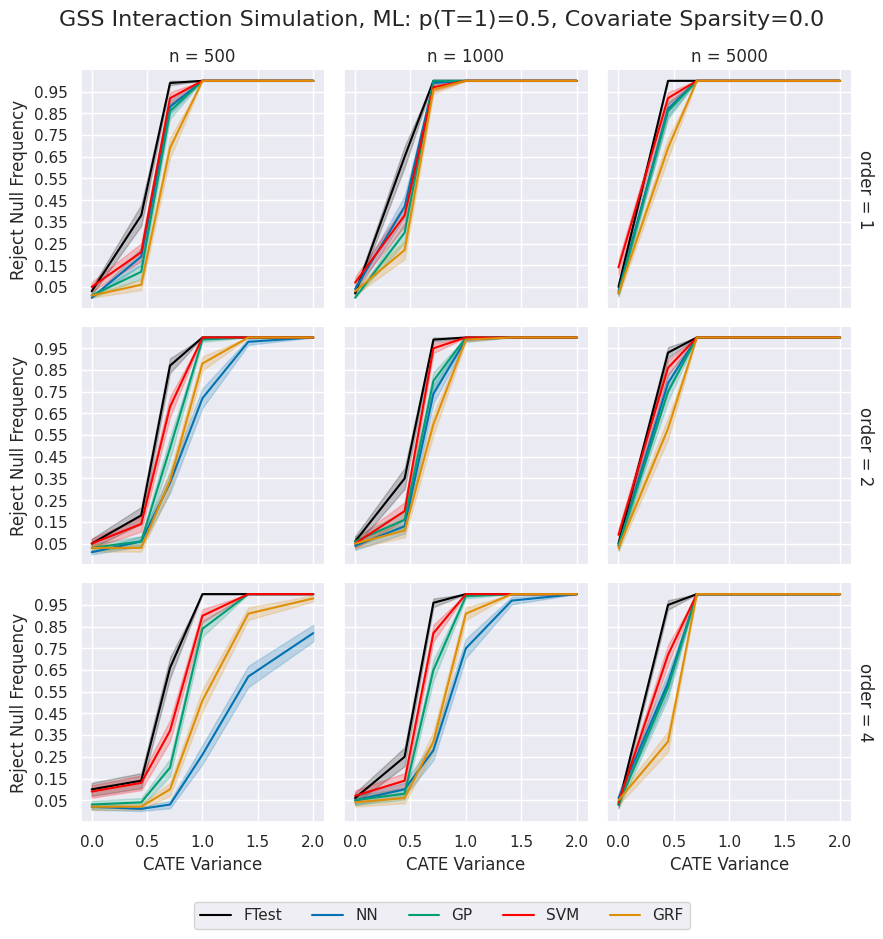

<Figure size 640x480 with 0 Axes>

In [45]:
palette = {
    "FTest": "black",
    "NN": "C0",
    "GP": "C2",
    "SVM": "red",
    "GRF": "C1"
}

# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="order", col="n", margin_titles=True)
# Map the lineplot to each facet
g.map_dataframe(
    sns.lineplot, 
    x="CATE Variance", 
    y="Reject Null Frequency", 
    hue="method", 
    palette=palette,
    errorbar="se"
)

# Remove the legends from each facet
for ax in g.axes.flat:
    _ = ax.set_yticks(np.arange(0.05, 1.0, 0.1))
    if ax.legend_:
        ax.legend_.remove()

# Draw a single legend
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.05))

g.fig.suptitle("GSS Interaction Simulation, ML: p(T=1)=0.5, Covariate Sparsity=0.0", fontsize=16)
plt.tight_layout()
plt.show()
plt.savefig("GSS-Interact-ML.png", dpi=600)

In [ ]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="order", col="n", margin_titles=True)
# Map the lineplot to each facet
g.map_dataframe(
    sns.lineplot, 
    x="CATE Variance", 
    y="mse", 
    hue="method", 
    errorbar="se"
)

# Remove the legends from each facet
for ax in g.axes.flat:
    if ax.legend_:
        ax.legend_.remove()

# Draw a single legend
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.05))

g.fig.suptitle("GSS Interaction Simulation, ML: p(T=1)=0.5, Covariate Sparsity=0.0", fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
base_dir = Path(f"../experiments/CATE/GSSInteract/")
df = pd.DataFrame()
methods = [
    "FTest",
    "OLS",
    "OLS-Interact",
    "OLS-Lasso",
    "OLS-Interact-Lasso",
]
balances = [
    0.5,
]
ns = [
    500,
    1000,
    5000,
]
orders = [
    1,
    2,
    4,
]
num_sims = 100
sparsity = 0.0
for method in methods:
    for balance in balances:
        for n in ns:
            for order in orders:
                for seed in range(num_sims):
                    exp_str = f"n={n}_balance={balance}_order={order}_sparsity={sparsity}_seed={seed}"
                    p = base_dir / f"{method}" / exp_str
                    df = pd.concat([df, pd.read_csv(p / "results.csv")], axis=0)

df["Reject Null Frequency"] = df["p-val-het"] <= 0.05
df["CATE Variance"] = np.sqrt(df["sigma-beta"])

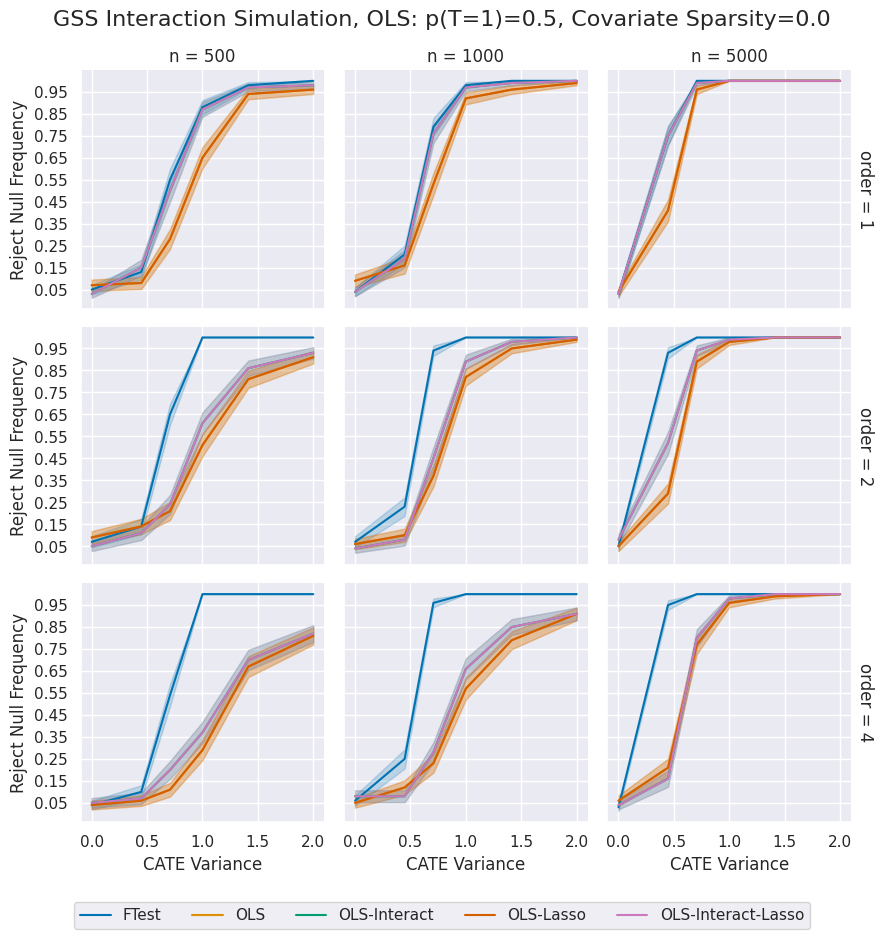

In [9]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="order", col="n", margin_titles=True)
# Map the lineplot to each facet
g.map_dataframe(
    sns.lineplot, 
    x="CATE Variance", 
    y="Reject Null Frequency", 
    hue="method", 
    errorbar="se"
)

# Remove the legends from each facet
for ax in g.axes.flat:
    _ = ax.set_yticks(np.arange(0.05, 1.0, 0.1))
    if ax.legend_:
        ax.legend_.remove()

# Draw a single legend
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.05))

g.fig.suptitle("GSS Interaction Simulation, OLS: p(T=1)=0.5, Covariate Sparsity=0.0", fontsize=16)
plt.tight_layout()
plt.show()

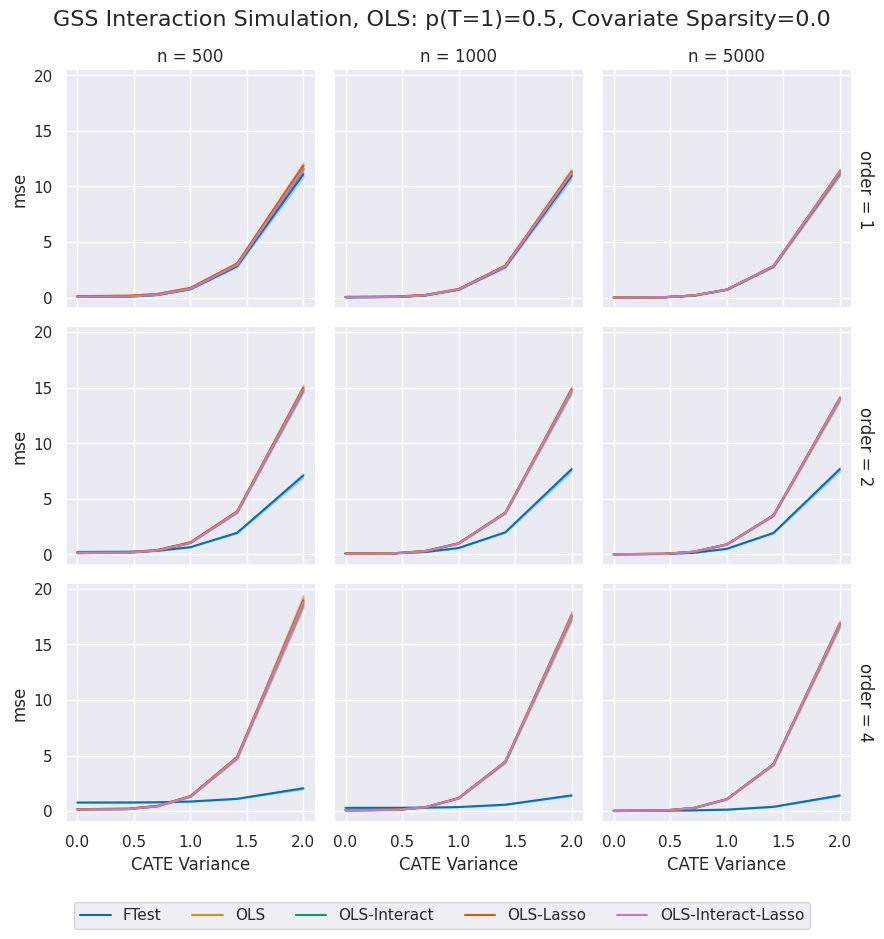

In [233]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="order", col="n", margin_titles=True)
# Map the lineplot to each facet
g.map_dataframe(
    sns.lineplot, 
    x="CATE Variance", 
    y="mse", 
    hue="method", 
    errorbar="se"
)

# Remove the legends from each facet
for ax in g.axes.flat:
    if ax.legend_:
        ax.legend_.remove()

# Draw a single legend
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.05))

g.fig.suptitle("GSS Interaction Simulation, OLS: p(T=1)=0.5, Covariate Sparsity=0.0", fontsize=16)
plt.tight_layout()
plt.show()

In [39]:
base_dir = Path(f"../experiments/CATE/GSSInteract/")
df = pd.DataFrame()
methods = [
    "FTest",
    # "OLS",
    # "OLS-Lasso",
    "OLS-Interact",
    "OLS-Interact-Lasso",
]
balances = [
    0.5,
]
ns = [
    500,
    1000,
    5000,
]
orders = [
    1,
    # 2,
    # 4,
]
num_sims = 100
sparsities = [
    0.0,
    0.2,
    0.5,
]
for method in methods:
    for balance in balances:
        for n in ns:
            for order in orders:
                for sparsity in sparsities:
                    for seed in range(num_sims):
                        exp_str = f"n={n}_balance={balance}_order={order}_sparsity={sparsity}_seed={seed}"
                        p = base_dir / f"{method}" / exp_str
                        df_new = pd.read_csv(p / "results.csv")
                        df_new["sparsity"] = sparsity
                        df = pd.concat([df, df_new], axis=0)

df["Reject Null Frequency"] = df["p-val-het"] <= 0.05
df["CATE Variance"] = np.sqrt(df["sigma-beta"])

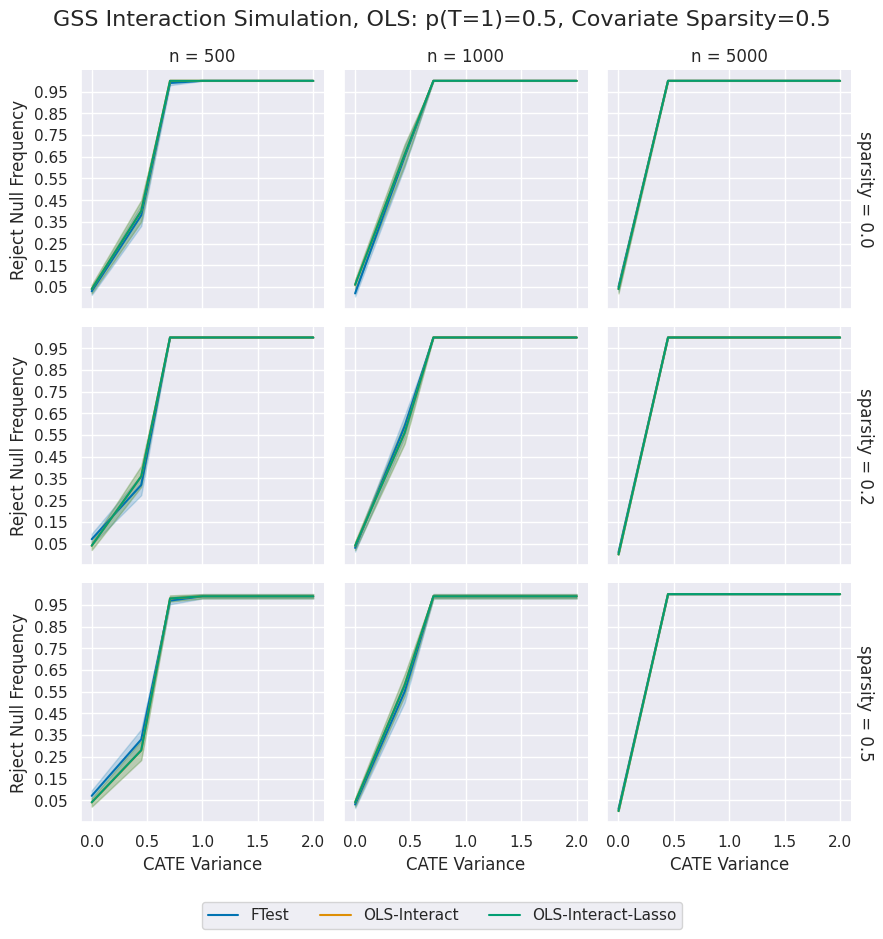

In [40]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="sparsity", col="n", margin_titles=True)
# Map the lineplot to each facet
g.map_dataframe(
    sns.lineplot, 
    x="CATE Variance", 
    y="Reject Null Frequency", 
    hue="method", 
    errorbar="se"
)

# Remove the legends from each facet
for ax in g.axes.flat:
    _ = ax.set_yticks(np.arange(0.05, 1.0, 0.1))
    if ax.legend_:
        ax.legend_.remove()

# Draw a single legend
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.05))

g.fig.suptitle(f"GSS Interaction Simulation, OLS: p(T=1)=0.5, Covariate Sparsity={sparsity}", fontsize=16)
plt.tight_layout()
plt.show()

In [27]:
base_dir = Path(f"../experiments/CATE/SinInteraction/")
df = pd.DataFrame()
methods = [
    # "FTest",
    "OLS-Interact",
    "NN",
    "GP",
    "SVM",
    "GRF",
]
balances = [
    0.5,
]
ns = [
    500,
    1000,
    2000,
]
orders = [
    # 1,
    2,
    # 4,
]
num_sims = 100
sparsity = 0.5
d = 8
sigma = 0.1
beta_t = 0.1
for method in methods:
    for balance in balances:
        for n in ns:
            for order in orders:
                for seed in range(num_sims):
                    exp_str = f"n={n}_d={d}_sigma={sigma}beta-t={beta_t}_balance={balance}_order={order}_sparsity={sparsity}_seed={seed}"
                    p = base_dir / f"{method}" / exp_str
                    df = pd.concat([df, pd.read_csv(p / "results.csv")], axis=0)

df["Reject Null Frequency"] = df["p-val-het"] <= 0.05
df["Heterogeneity Scale"] = np.sqrt(df["slope"])
df.loc[df["method"] == "FTest", "method"] = "FTest (1st order)"

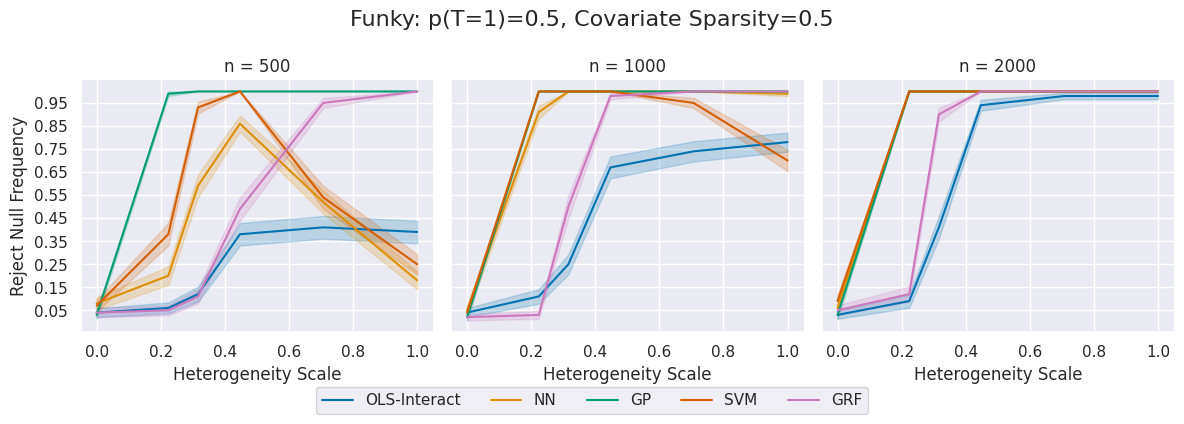

<Figure size 640x480 with 0 Axes>

In [28]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, col="n", margin_titles=True, height=4)
# Map the lineplot to each facet
g.map_dataframe(
    sns.lineplot, 
    x="Heterogeneity Scale", 
    y="Reject Null Frequency", 
    hue="method", 
    errorbar="se"
)

# Remove the legends from each facet
for ax in g.axes.flat:
    _ = ax.set_yticks(np.arange(0.05, 1.0, 0.1))
    if ax.legend_:
        ax.legend_.remove()

# Draw a single legend
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.05))

g.fig.suptitle(f"Funky: p(T=1)=0.5, Covariate Sparsity={sparsity}", fontsize=16)
plt.tight_layout()
plt.show()
plt.savefig("Funky-ML.png", dpi=600)

In [6]:
base_dir = Path(f"../experiments/CATE/GSS/")
df = pd.DataFrame()
methods = [
    "OLS",
    "NN",  
    "GP",
    "SVM",
    "GRF",
]
balances = [
    0.5,
]
ns = [
    500,
    1000,
    5000,
    10000,
    # 20000,
]
num_sims = 100
for method in methods:
    for balance in balances:
        for n in ns:
            for seed in range(num_sims):
                exp_str = f"n={n}_balance={balance}_seed={seed}"
                p = base_dir / f"{method}" / exp_str
                df = pd.concat([df, pd.read_csv(p / "results.csv")], axis=0)

In [30]:
df.loc[df["method"] == "FTest", "method"] = "FTest (1st order)"

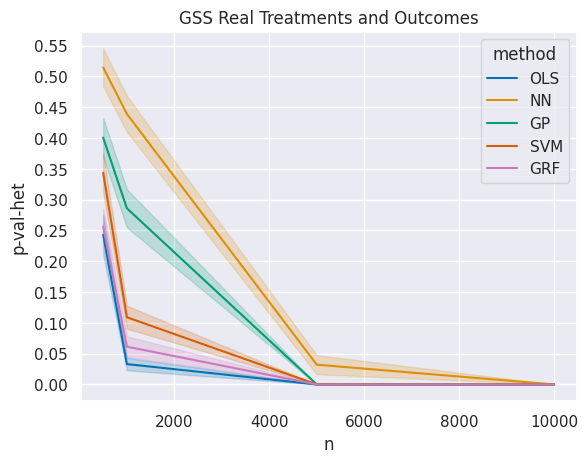

In [7]:
_ = sns.lineplot(
    df, 
    x="n",
    y="p-val-het",
    hue="method",
    errorbar="se",
)
_ = plt.yticks(np.arange(0, 0.6, 0.05))
_ = plt.title("GSS Real Treatments and Outcomes")
plt.savefig("GSS-Real-ML.png", dpi=600)

In [2]:
base_dir = Path(f"../experiments/CATE/Facebook/")
df = pd.DataFrame()
methods = [
    # "OLS-Interact",
    "OLS",
    "NN",  
    "GP",
    "SVM",
    "GRF",
]
balances = [
    0.5,
]
ns = [
    500,
    1000,
    1660,
]
num_sims = 200
for method in methods:
    for balance in balances:
        for n in ns:
            for seed in range(num_sims):
                exp_str = f"n={n}_seed={seed}"
                p = base_dir / f"{method}" / exp_str
                df = pd.concat([df, pd.read_csv(p / "results.csv")], axis=0)

df.loc[df["method"] == "FTest", "method"] = "FTest (1st order)"

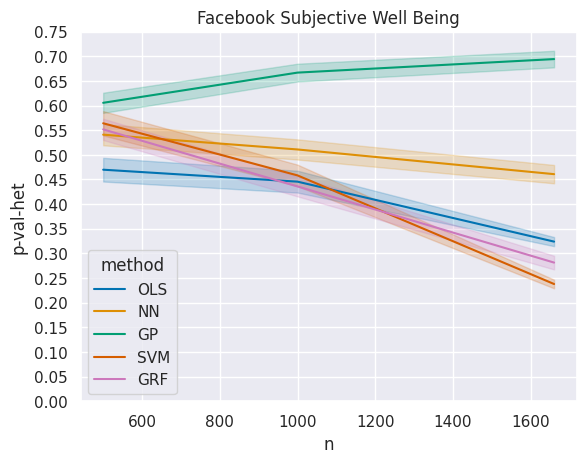

In [5]:
_ = sns.lineplot(
    df, 
    x="n",
    y="p-val-het",
    hue="method",
    errorbar="se",
)
_ = plt.yticks(np.arange(0, 0.8, 0.05))
_ = plt.title("Facebook Subjective Well Being")
plt.savefig("Facebook-Real-ML.png", dpi=600)